## ***Постановка задачи***

---


0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор ближайших соседей (попробовать разное их количество)
8. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы"

## **0. Описание задачи словами**

---



Компания, расположенная в Сингапуре и занимающаяся страхованием путешествий, предоставила данные о страховых агенствах. Задача состоит в предсказании вероятности наступления случая, требующего страховых выплат.

## **1. Чтение данных**

---

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn
url = 'https://raw.githubusercontent.com/karinamedvedeva/MachineLearning/main/travel_insurance.csv'
data = pd.read_csv(url)
data.shape
data

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


Данная таблица содержит 63326 объектов с 11 признаками.

<br>
<br>
<br>

***Подробнее о признаках:***
1.   Agency - название агентства
2.   Agency Type - тип агенства по страхованию путешествий
3.   Distribution Channel - канал распространения страховых агенств
4.   Product Name - название страхового продукта
5.   Claim - статус страхового случая
6.   Duration - продолжительность поездки
7.   Destination - страна назачения
8.   Net Sales - выручка от проданных страховых полисов
9.   Commission - комиссия, которую получило страховое агентство
10.  Gender - пол застрахованного
11.  Age - возраст застрахованного



**Необходимо проверить числовые признаки на наличие выбросов:**
<br>
Визуализируем график зависимости статуса страхового случая от продолжительности поездки:

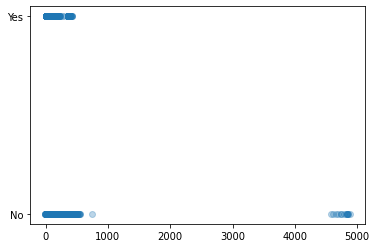

In [3]:
plt.scatter(data['Duration'], data['Claim'], alpha=0.3)
pass

Теперь зависимость для признака "Размер выручки от проданных страховок":

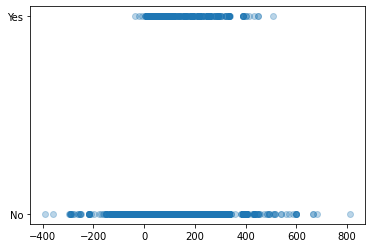

In [4]:
plt.scatter(data['Net Sales'], data['Claim'], alpha=0.3)
pass

Зависимость для признака "Комиссия":

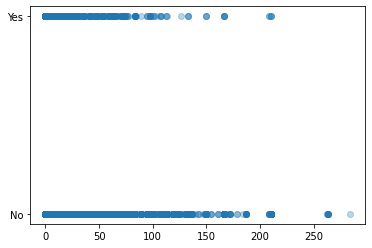

In [5]:
plt.scatter(data['Commision (in value)'], data['Claim'], alpha=0.3)
pass

Зависимость для признака "Возраст застрахованного"

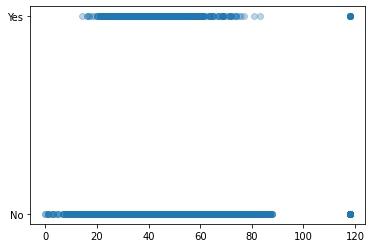

In [6]:
plt.scatter(data['Age'], data['Claim'], alpha=0.3)
pass

По первому графику видно, что есть вероятность выбросов справа снизу. На втором графике выбросы наблюдаются слева и справа снизу. На третьем графике - справа. На четвертом графике - справа. <br>

Посчитаем для всех зависимостей квантили:

In [7]:
data['Duration'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      1.0
0.010      1.0
0.050      3.0
0.100      5.0
0.500     22.0
0.900    109.0
0.950    190.0
0.990    374.0
0.995    388.0
Name: Duration, dtype: float64

In [8]:
data['Net Sales'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    -49.5000
0.010    -12.0000
0.050      4.8825
0.100     10.0000
0.500     26.5300
0.900     80.0000
0.950    112.0000
0.990    252.8500
0.995    291.7500
Name: Net Sales, dtype: float64

In [9]:
data['Commision (in value)'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      0.00
0.010      0.00
0.050      0.00
0.100      0.00
0.500      0.00
0.900     29.70
0.950     51.13
0.990     89.10
0.995    112.86
Name: Commision (in value), dtype: float64

In [10]:
data['Age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.98,.995])

0.005     20.0
0.010     21.0
0.050     25.0
0.100     28.0
0.500     36.0
0.900     55.0
0.950     63.0
0.980     75.0
0.995    118.0
Name: Age, dtype: float64

Получаем, что <br>
99,5% путешествий длятся меньше 388 дней <br>
99,5% выручки варьируется в диапазоне от -49.5 до 291.75 <br>
99,5% комиссии не превышает отметку в 112.86 <br>
99,5% людей, младше 118 лет

<br>
<br>
<br>
Удаляем все строчки из датасета, которые соответсвуют выбросам:

In [11]:
rows_to_drop = data[
    (data['Duration'] > data['Duration'].quantile(0.995)) | 
    (data['Net Sales']  < data['Net Sales' ].quantile(0.005)) | (data['Net Sales']  > data['Net Sales' ].quantile(0.995)) | 
    (data['Age']  < data['Age' ].quantile(0.005)) | (data['Age']  > data['Age' ].quantile(0.98)) |
    (data['Commision (in value)']  > data['Commision (in value)' ].quantile(0.995))].index
upd_data = data.drop(rows_to_drop)
upd_data.shape

(60782, 11)


**Теперь преобразуем признаки типа object в категориальные:**

Рассмотрим все категории:

In [12]:
upd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60782 entries, 1 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                60782 non-null  object 
 1   Agency Type           60782 non-null  object 
 2   Distribution Channel  60782 non-null  object 
 3   Product Name          60782 non-null  object 
 4   Claim                 60782 non-null  object 
 5   Duration              60782 non-null  int64  
 6   Destination           60782 non-null  object 
 7   Net Sales             60782 non-null  float64
 8   Commision (in value)  60782 non-null  float64
 9   Gender                16250 non-null  object 
 10  Age                   60782 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.6+ MB


 0   Agency (категориальный)              
 1   Agency Type (категориальный) <br>
 2   Distribution Channel (категориальный) <br>
 3   Product Name (категориальный)<br>
 4   Claim <br>
 5   Duration (числовой) <br>
 6   Destination (категориальный) <br>
 7   Net Sales (числовой) <br>
 8   Commision (in value) (числовой) <br>
 9   Gender (категориальный) <br>
 10  Age (числовой)


In [13]:
upd_data['Agency'] = upd_data['Agency'].astype('category')
upd_data['Agency Type'] = upd_data['Agency Type'].astype('category')
upd_data['Distribution Channel'] = upd_data['Distribution Channel'].astype('category')
upd_data['Product Name'] = upd_data['Product Name'].astype('category')
upd_data['Destination'] = upd_data['Destination'].astype('category')
upd_data['Gender'] = upd_data['Gender'].astype('category')

In [14]:
upd_data['Gender'].dtype

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [15]:
upd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60782 entries, 1 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Agency                60782 non-null  category
 1   Agency Type           60782 non-null  category
 2   Distribution Channel  60782 non-null  category
 3   Product Name          60782 non-null  category
 4   Claim                 60782 non-null  object  
 5   Duration              60782 non-null  int64   
 6   Destination           60782 non-null  category
 7   Net Sales             60782 non-null  float64 
 8   Commision (in value)  60782 non-null  float64 
 9   Gender                16250 non-null  category
 10  Age                   60782 non-null  int64   
dtypes: category(6), float64(2), int64(2), object(1)
memory usage: 3.2+ MB


## **2. Визуализация данных и вычисление основных характеристик**

---


Описательная статистика по датасету:

In [16]:
upd_data.describe()

,Duration,Net Sales,Commision (in value),Age
count,60782.000000,60782.000000,60782.000000,60782.000000
mean,44.561745,38.383437,8.293383,38.630499
std,65.412176,38.869487,15.382017,9.615026
min,0.000000,-49.500000,0.000000,20.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.000000,0.000000,36.000000
75%,51.000000,46.000000,10.000000,42.000000
max,388.000000,291.750000,112.860000,75.000000


где *count* - количество значений для каждого признака. В данной таблице представлены данные только числовых признаков, причем ни в одном из них нет пропущенных значений, поэтому количества значений для представленных признаков равны. <br>
*mean* - среднее значение <br>
*std* - стандартное отклонение <br>
*min* - минимальное значение <br>
*25%* - первый квартиль <br>
*50%* - медиана <br>
*75%* - третий квартиль <br>
*max* - максимальное значение <br>

<br> 
Теперь рассмотрим категориальные признаки:

In [17]:
upd_data.describe(include=['category'])

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Gender
count,60782,60782,60782,60782,60782,16250
unique,15,2,2,24,146,2
top,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE,M
freq,34916,44978,59922,18538,12559,8257


где *count* - количество значений для каждого признака (значения признака Gender отличаются от всех остальных, так как в нем есть пропущенные значения) <br>
*unique* - количество уникальных значений <br>
*top* - значения, встречающиеся чаще всего <br>
*freq* - частота значений top <br>

<br>
<br>
<br>
<br>

Вычислим матрицу корреляции:

In [39]:
corr_matrix = upd_data.corr()
corr_matrix

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.565808,0.364603,0.014525
Net Sales,0.565808,1.000000,0.600208,0.024196
Commision (in value),0.364603,0.600208,1.000000,0.127943
Age,0.014525,0.024196,0.127943,1.000000


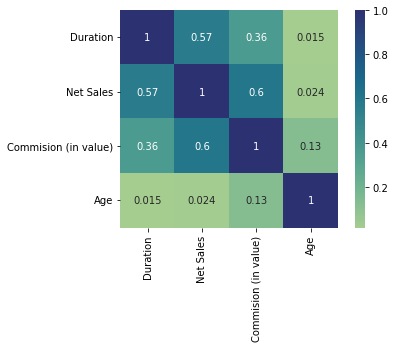

In [40]:
sns.heatmap(corr_matrix, square=True, cmap="crest", annot=True)
pass

По визуализации матрицы коллеряции видно, что есть три пары связанных признаков: 

*   Net Sales и Commision (in value) со степенью корреляции, равной 0.6
*   Net Sales и Duration со степенью корреляции, равной 0.57
*   Commision (in value) и Duration со степенью корреляции, равной 0.36



Взаимосвязь остальных пар очень слабая. <br>
<br>
<br>
<br>

Выведем графики, интересующих нас пар:


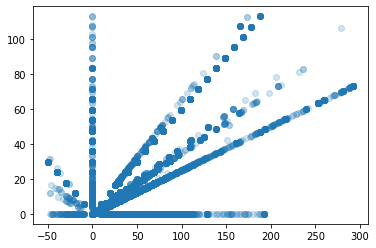

In [20]:
plt.scatter(upd_data['Net Sales'], upd_data['Commision (in value)'], alpha=0.2)
pass

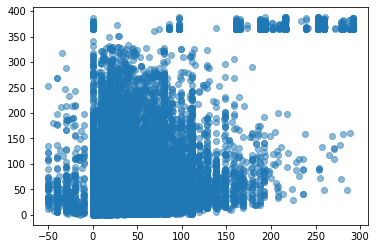

In [21]:
plt.scatter(upd_data['Net Sales'], upd_data['Duration'], alpha=0.5)
pass

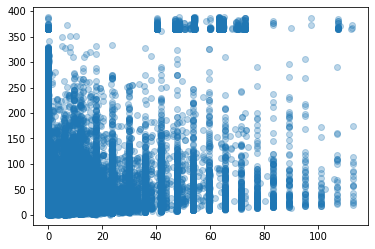

In [22]:
plt.scatter(upd_data['Commision (in value)'], upd_data['Duration'], alpha=0.3)
pass

# **3. Обработка пропущенных значений**

---

Посмотрим какие столбцы имеют пропуски

In [41]:
upd_data.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  44532
Age                         0
dtype: int64

Видим, что пропущенные значения присутсвуют только у признака Gender. Их необходимо заполнить, так как иначе утеряется значительная часть информации датасета. 

In [17]:
upd_data['Gender'].mode()


0    M
Name: Gender, dtype: category
Categories (2, object): ['F', 'M']

In [18]:
upd_data['Gender'].fillna(upd_data['Gender'].mode()[0], inplace = True)
upd_data.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64

Пропущенные значения обработаны, пропусков у признака Gender не осталось.


## **4. Обработка категориальных признаков**

---

Среди категориальных признаков есть бинарные и небинарные.
<br>
К бинарным относятся такие признаки, как Agency Type, Distribution Channel, Claim и Gender. Заменим их значения на 0 и 1.

In [19]:
upd_data['Agency Type'] = pd.factorize(upd_data['Agency Type'])[0]
upd_data['Distribution Channel'] = pd.factorize(upd_data['Distribution Channel'])[0]
upd_data['Gender'] = pd.factorize(upd_data['Gender'])[0]

In [20]:
upd_data['Claim'] = pd.factorize(upd_data['Claim'])[0]
upd_data

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
1,CBH,0,0,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,0,71
2,CWT,0,1,Rental Vehicle Excess Insurance,0,65,AUSTRALIA,-49.5,29.70,1,32
3,CWT,0,1,Rental Vehicle Excess Insurance,0,60,AUSTRALIA,-39.6,23.76,1,32
4,CWT,0,1,Rental Vehicle Excess Insurance,0,79,ITALY,-19.8,11.88,1,41
6,CWT,0,1,Rental Vehicle Excess Insurance,0,47,UNITED STATES,-39.6,23.76,1,32
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,1,1,Basic Plan,0,111,JAPAN,35.0,12.25,1,31
63322,JZI,1,1,Basic Plan,0,58,CHINA,40.0,14.00,0,40
63323,JZI,1,1,Basic Plan,0,2,MALAYSIA,18.0,6.30,1,57
63324,JZI,1,1,Basic Plan,0,3,VIET NAM,18.0,6.30,1,63


К небинарным признакам применим метод векторизации:

In [21]:
upd_agency = pd.get_dummies(upd_data['Agency'])
upd_product_name = pd.get_dummies(upd_data['Product Name'])
upd_destination = pd.get_dummies(upd_data['Destination'])
upd_data = pd.concat((upd_data, upd_agency, upd_product_name, upd_destination), axis = 1)
upd_data = upd_data.drop(['Agency','Product Name', 'Destination'], axis = 1)
upd_data

,Agency Type,Distribution Channel,Claim,Duration,Net Sales,Commision (in value),Gender,Age,ADM,ART,...,UNITED KINGDOM,UNITED STATES,URUGUAY,UZBEKISTAN,VANUATU,VENEZUELA,VIET NAM,"VIRGIN ISLANDS, U.S.",ZAMBIA,ZIMBABWE
1,0,0,0,186,-29.0,9.57,0,71,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,65,-49.5,29.70,1,32,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,60,-39.6,23.76,1,32,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,79,-19.8,11.88,1,41,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,47,-39.6,23.76,1,32,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63321,1,1,0,111,35.0,12.25,1,31,0,0,...,0,0,0,0,0,0,0,0,0,0
63322,1,1,0,58,40.0,14.00,0,40,0,0,...,0,0,0,0,0,0,0,0,0,0
63323,1,1,0,2,18.0,6.30,1,57,0,0,...,0,0,0,0,0,0,0,0,0,0
63324,1,1,0,3,18.0,6.30,1,63,0,0,...,0,0,0,0,0,0,1,0,0,0


## **5. Нормализация**

---


In [22]:
data_normalized = (upd_data - upd_data.min(axis=0)) / (upd_data.max(axis=0) - upd_data.min(axis=0))
data_normalized.describe()

,Agency Type,Distribution Channel,Claim,Duration,Net Sales,Commision (in value),Gender,Age,ADM,ART,...,UNITED KINGDOM,UNITED STATES,URUGUAY,UZBEKISTAN,VANUATU,VENEZUELA,VIET NAM,"VIRGIN ISLANDS, U.S.",ZAMBIA,ZIMBABWE
count,60782.000000,60782.000000,60782.000000,60782.000000,60782.000000,60782.000000,60782.000000,60782.000000,60782.000000,60782.000000,...,60782.000000,60782.000000,60782.000000,60782.000000,60782.000000,60782.000000,60782.000000,60782.000000,60782.000000,60782.000000
mean,0.260011,0.985851,0.014017,0.114850,0.257534,0.073484,0.868497,0.338736,0.001135,0.004475,...,0.020829,0.037741,0.000016,0.000165,0.000082,0.000082,0.027409,0.000016,0.000033,0.000049
std,0.438644,0.118106,0.117563,0.168588,0.113903,0.136293,0.337952,0.174819,0.033674,0.066746,...,0.142811,0.190572,0.004056,0.012826,0.009069,0.009069,0.163275,0.004056,0.005736,0.007025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.023196,0.197802,0.000000,1.000000,0.272727,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.056701,0.221245,0.000000,1.000000,0.290909,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.131443,0.279853,0.088605,1.000000,0.400000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **6. Деление данных на обучающую и тестовую выборки**

---

Для нахождения решения задачи будем использовать все признаки кроме Claim:

In [23]:
X = data_normalized.drop(['Claim'], axis = 1)
Y = data_normalized['Claim']

Разбиваем данные в соотношении 75% (обучающая выборка) к 25% (тестовая выборка)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 100)

N_train = X_train.shape[0]
N_test = X_test.shape[0]
N_train, N_test

(45586, 15196)

## **7. Запуск классификатора ближайших соседей**

---


In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

Увеличим количество соседей до 8:

In [26]:
knn_8 = KNeighborsClassifier(n_neighbors = 8)
knn_8.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=8)

Снизим количество соседей до 1:

In [27]:
knn_1 = KNeighborsClassifier(n_neighbors = 1)
knn_1.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

## **8. Вычисление ошибок на обучающей и тестовой выборках. Выводы**

---



In [28]:
Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)
Y_train_score = np.mean(Y_train != Y_train_pred)
Y_test_score = np.mean(Y_test != Y_test_pred)
Y_train_score, Y_test_score

(0.013885842144518054, 0.014477494077388787)

При использовании 5 соседей ошибка на обучающей выборке получается равна ~1,39%, а на тестовой выборке ~1,44%.

In [29]:
Y_train_pred = knn_8.predict(X_train)
Y_test_pred = knn_8.predict(X_test)
Y_train_score = np.mean(Y_train != Y_train_pred)
Y_test_score = np.mean(Y_test != Y_test_pred)
Y_train_score, Y_test_score

(0.013951651822928093, 0.014411687286127928)

При использовании 8 соседей ошибка на обучающей выборке получается равна ~1,4% , а на тестовой выборке ~1,44%

In [30]:
Y_train_pred = knn_1.predict(X_train)
Y_test_pred = knn_1.predict(X_test)
Y_train_score = np.mean(Y_train != Y_train_pred)
Y_test_score = np.mean(Y_test != Y_test_pred)
Y_train_score, Y_test_score

(0.0012942570087307508, 0.027244011581995263)

При использовании 1 соседа ошибка на обучающей выборке получается равна ~0,13%, а на тестовой выборке ~2,72%

***Вывод:*** Запуск классификатора ближайших соседей с количеством соседей 5 дает хороший результат на выборке. Увеличение количества соседей не приводит к улучушению результата, значения ошибки остаются неизменными. А вот при уменьшении количества соседей увеличивается ошибка на тестовой выборке, но уменьшается на обучающей.

## **9. Запуск других классификаторов**

---



In [31]:
from sklearn.tree import DecisionTreeClassifier
desTrCl = DecisionTreeClassifier()
desTrCl.fit(X_train,Y_train)

print ('Depth:', desTrCl.get_depth())
print ('Leaves:', desTrCl.get_n_leaves())

err_train = np.mean(Y_train != desTrCl.predict(X_train))
err_test  = np.mean(Y_test  != desTrCl.predict(X_test))

print(err_train, err_test)

Depth: 35
Leaves: 1621
0.0011626376519106743 0.027375625164516977


При использовании дерева решений ошибка на обучающей выборке получается равна ~0,12%, а на тестовой выборке ~2,74%. Результат на обучающей выборке лучше, чем с классификатором ближайших соседей, а результат на тестовой выборке хуже.

## **12. Общие выводы**

---

В данной работе был проведен анализ датасета, который содержит данные о страховых агенствах и туристических страховых случаев. Необходимо было предсказать наступление страхового случая. <br>
В ходе работы было выполнено: <br>


1.   Загрузка и чтение данных
2.   Визуализация данных и вычисление основных их характеристик
3.   Обработка пропущенных значений: они были заполнены
4.   Обработка категориальных признаков с помощью методов бинаризации и векторизации
5.   Нормализация данных с помощью линейного преобразования к отрезку
6.   Разбиение данных на обучающую и тестовую выборки
7.   Запуск классификатора ближайших соседей
8.   Вычисление ошибки на обучающей и тестовой выборках
9.   Запуск других классификаторов (дерево решений)

В результате, выяснилось что при использовании классификатора ближайших соседей с параметрами по умолчанию (5 соседей) и с количеством соседей равным 8, результаты получились похожие и имеют наилучший показатель для тестовой выборки. Для обучающей выборки наилучшие результаты дали дерево решений и классификатор ближайших соседей с количеством соседей, равным 1.
